# K-means algorithm for image posterization

Following the topics presented in the lecture $02$, about clustering methods, implement a naive method of clusterization using a simple `K-means` algorythm

The dataset is the set of pixel of an image, each point $x$ in the dataset has 3 components: $(R,G,B)$, integers in the range $0..255$
$$x \in \mathbb{N}^3_{[0..255]}$$

The algorithm consists of three main steps:

0. An **initialization** step: in which cluster gets randomly initialized by generating $K$ random means and assigning eac point to the cluster based on the distance from the mean.
1. An **assignment** step: in which every observation is assigned to a cluster based on the nearest mean.
2. An **update** step: in which the means are recalculated based on the previous step
- The algorithm then repeats steps `1` and `2` until the means converge to a configuration results in a local minimum of the clusterization.

Define The number of cluster **K**

In [302]:
image_path = "data/poh.png"
K = 6

Load the dataset as a vector of size 3: $(R,\ G,\ B)$, and add a class label

In [303]:
from PIL import Image
import numpy as np

image = np.array(Image.open(image_path))[:,:,:3]
height = image.shape[0]; width = image.shape[1]; size = height * width

print(f"{image.shape}")
data_array = np.pad(image.reshape(-1,3), ((0, 0), (0, 1)), 'constant', constant_values=0)

(355, 474, 3)


## Define "distance"

The objective of $K$-means algorythm is to chose a classification that minimize the distance between elements within the same cluster, to do this let's define the Euclidean distance
$$d(a,b) = \sqrt{\sum_{i=1}^3 (a_i - b_i)^2}$$

In [304]:
d = lambda a, b: np.linalg.norm(a - b)

## Setup step

The first step of the algorithm requires to randomly initialize the value of the means of the $K$ clusters

In [305]:
means = np.random.randint(0, 255, size = (K, 3), dtype = np.uint8)
means = np.hstack((means, np.arange(K).reshape((-1,1))))
print(means[:,:3])

[[132 104 110]
 [146 147   7]
 [151   9  89]
 [ 43  26 230]
 [173 157 132]
 [144  68 122]]


## Point classification

Define a function to compute the point's class, this is a classifier function $C(x)$ that outputs an index corresponding to the nearest cluster's mean $\mu_k$

$$C(x) = \argmin_k\left\{d(x,\mu_k)\right\}$$

In [306]:
def C(x):
    cl = 0; min_d = 255
    for c in range(K):
        _d = d(x[:3], means[c][:3])
        if _d < min_d:
            min_d = _d; cl = c
    return cl

## Provide a way to stop the program

The algorythm is guaranteed to converge to a local minimum, however, given the nature of the data (discrete integer) it's possible that it keeps cycling between $M$ states, to avoid this keep track of all the previous states, this also allow to visualize the result of the

In [307]:
old_means = []

def history(m):
    for i in old_means:
        if np.all(np.equal(i, m)): return False
    return True

## Define actions

To perform in the two steps of the algorythm:
- The classification step
- The mean's update step

In [308]:
classify = lambda x: np.concatenate((x[:3], np.array([C(x)])))
update = lambda c: np.concatenate((np.mean(data_array[data_array[:, 3] == c[-1]], axis = 0)[:3], np.array([c[-1]])))

In [ ]:
while history(means): # Repeat these steps until the means reach a local minimum
    # Save means in history
    old_means.append(means.copy())
    # Classify the array according to the new mean
    data_array = np.apply_along_axis(classify, 1, data_array)
    # Compute the new mean according to the classification
    means = np.apply_along_axis(update, 1, means).astype(np.uint8)
old_means.append(means.copy())

In [310]:
print(f"Means:\n{means[:,:3]}")

Means:
[[168 164 142]
 [244 198  55]
 [ 86  86  77]
 [ 16  13  11]
 [232 225 195]
 [191  22  37]]


## Result

Following is an example of a run output, setting $K=6$ clusters, being this algorithm highly dependent to the initial condition, there is no guarantee that this is the configuration that minimize the cluster's variance

(-0.5, 473.5, 354.5, -0.5)

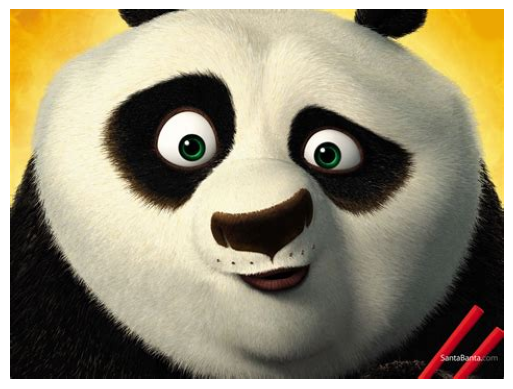

In [311]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')

(-0.5, 473.5, 354.5, -0.5)

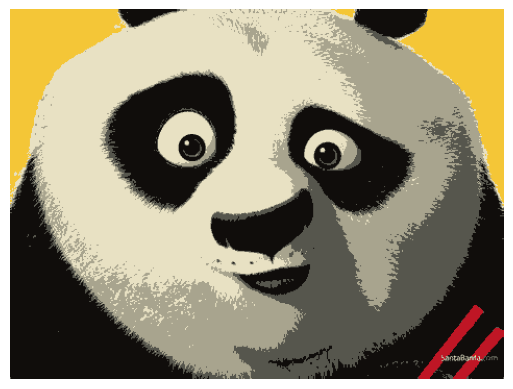

In [312]:
img = np.empty((height * width, 3), dtype=np.uint8)

for i in range(size): img[i] = means[data_array[i,3]][:3]
    
plt.imshow(img.reshape((height, width, 3)))
plt.axis('off')

(-0.5, 24.5, 5.5, -0.5)

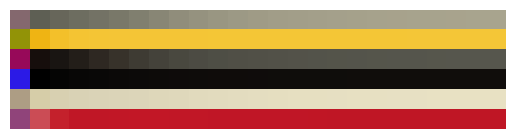

In [313]:
plt.imshow(np.array(old_means)[:,:,:3].swapaxes(0,1))
plt.axis('off')